In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

In [60]:
pools = ['Pool_49', 'Pool_52', 'Pool_60']
algorithms = ['DeepNovo', 'PEAKS', 'Novor', 'DirecTag']
#algorithms = ['DeepNovo']
#algorithms = ['PEAKS']
#algorithms = ['Novor']
#algorithms = ['DirecTag']
alg_file = ['deepnovo', 'peaks', 'novor', 'direcTag']

RESULT_DIR = '../../../Data/Analysis_new/'

In [50]:
experiment_data_dict = {}

for p in pools:
    pool_dict = {}
    for alg, file in zip(algorithms, alg_file):
        raw_data = pd.read_csv(
            f"../../../Data/Datasets/{p}/Thermo_SRM_{p}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
            sep='\t', index_col=None)
        pool_dict[alg] = raw_data[['Scan number', 'Identified', 'Sequence']]
    experiment_data_dict[p] = pool_dict



In [39]:
scored_data_dict = {}

for p in pools:
    pool_dict = {}
    for alg, file in zip(algorithms, alg_file):
        file = file + '_scored'
        if file == 'direcTag_scored':
            file = file + '_grouped'

        identified_maxquant = pd.read_csv(f'../../../Data/ScoringResults/{p}/{file}.tsv', sep='\t', index_col=None,
                                          header=0)
        identified_maxquant['by'] = 'MaxQuant'
        identified_inclusion_list = pd.read_csv(
            f'../../../Data/ScoringResults_Unidentified/CheckInclusionList/{p}/{file}.tsv', sep='\t', index_col=None,
            header=0)
        identified_inclusion_list['by'] = 'InclusionList'
        pool_dict[alg] = pd.concat([identified_maxquant, identified_inclusion_list], axis=0)
    scored_data_dict[p] = pool_dict

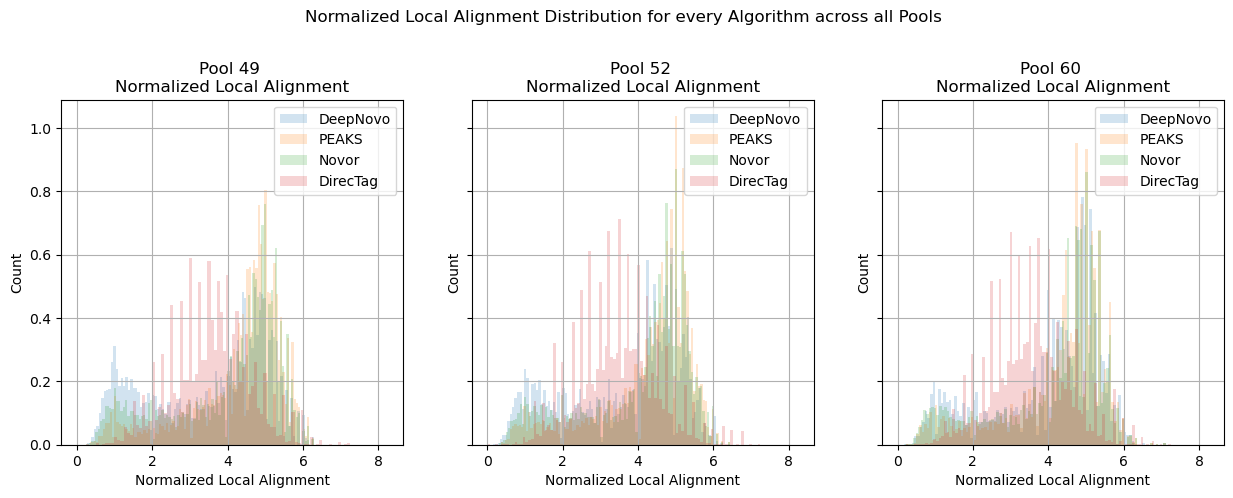

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)
for i, p in enumerate(pools):
    for alg in algorithms:
        scored_data_dict[p][alg] = scored_data_dict[p][alg]
        ax[i].hist(scored_data_dict[p][alg]['Normalized Local Alignment'], bins=100, alpha=0.2, label=alg, density=True)
    ax[i].set_title(f"{' '.join(p.split('_'))} \nNormalized Local Alignment")
    ax[i].set_xlabel('Normalized Local Alignment')
    ax[i].set_ylabel('Count')
    ax[i].grid()
    ax[i].legend()
plt.suptitle('Normalized Local Alignment Distribution for every Algorithm across all Pools\n\n')
plt.subplots_adjust(top=0.8)
plt.savefig(f'{RESULT_DIR}normalized_local_scores.png')
plt.show()


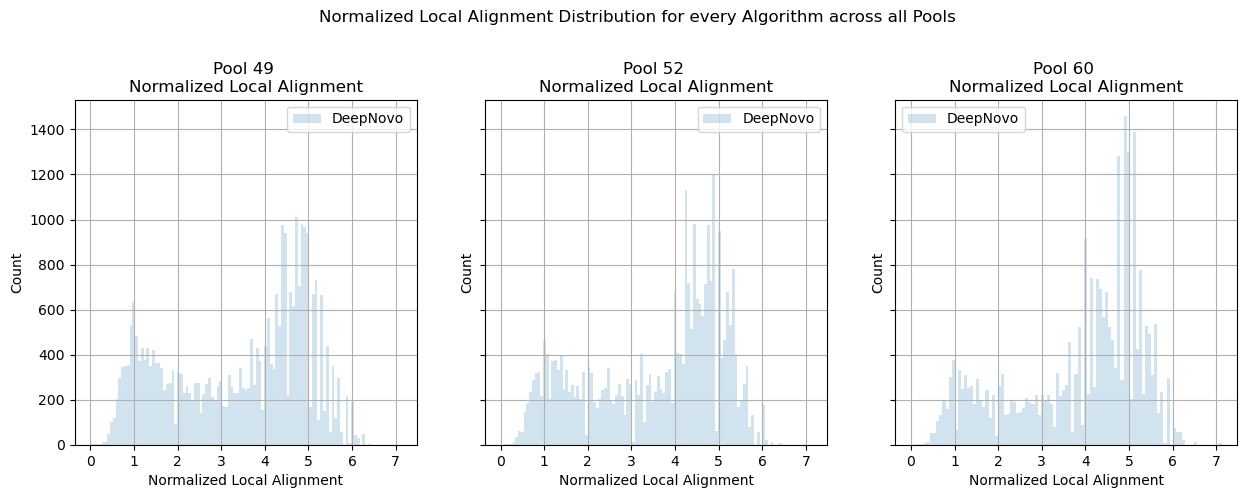

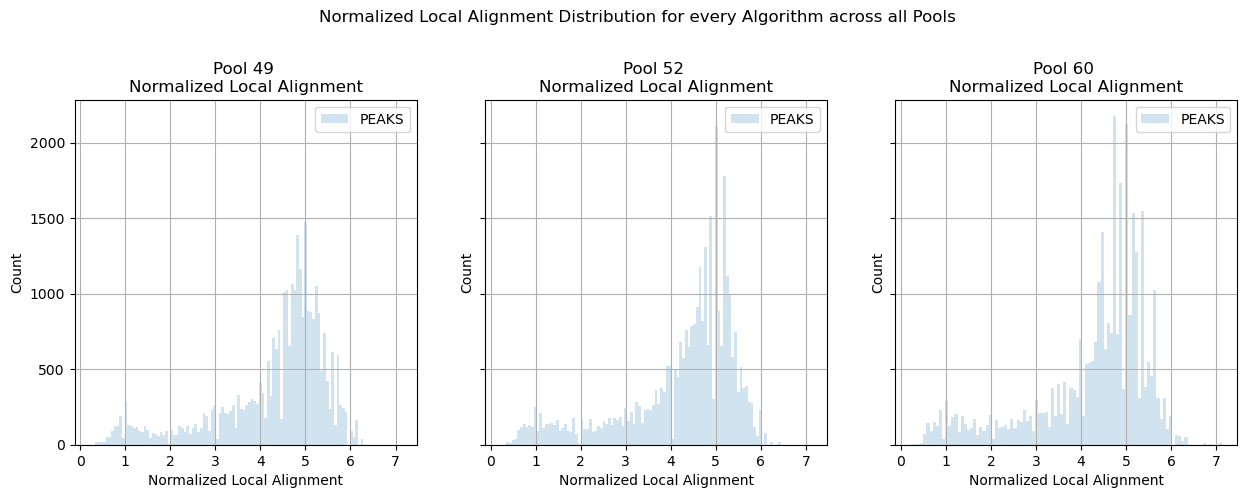

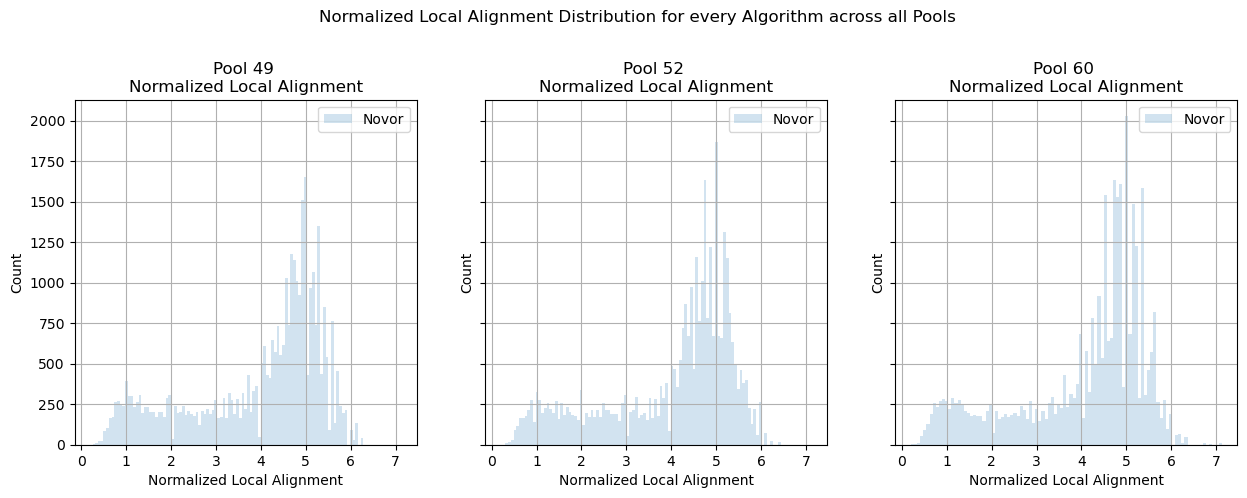

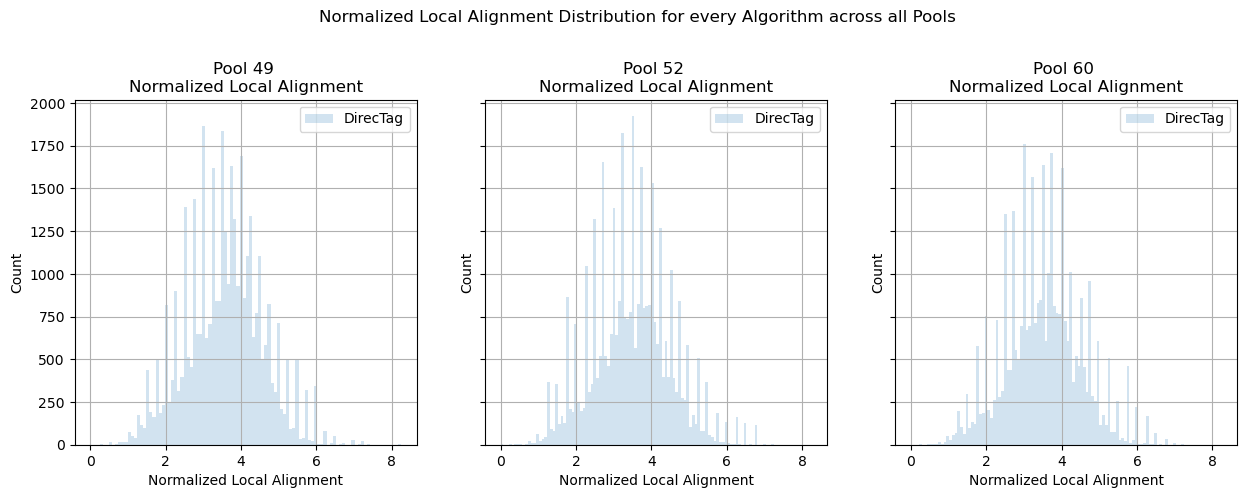

In [64]:


for alg in algorithms:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)
    for i, p in enumerate(pools):
        scored_data_dict[p][alg] = scored_data_dict[p][alg]
        ax[i].hist(scored_data_dict[p][alg]['Normalized Local Alignment'], bins=100, alpha=0.2, label=alg)
        ax[i].set_title(f"{' '.join(p.split('_'))} \nNormalized Local Alignment")
        ax[i].set_xlabel('Normalized Local Alignment')
        ax[i].set_ylabel('Count')
        ax[i].grid()
        ax[i].legend()
    plt.suptitle('Normalized Local Alignment Distribution for every Algorithm across all Pools\n\n')
    plt.subplots_adjust(top=0.8)
    #plt.savefig(f'{RESULT_DIR}normalized_local_scores.png')
    plt.show()
